In [24]:
import pandas as pd 
import os
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier 
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, roc_auc_score,confusion_matrix,f1_score
import matplotlib.pyplot as plt
import pickle

In [5]:
#read dataset 
df=pd.read_csv("cleaned_dataset.csv")
df.head(5)

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Credit_Amount,Loan_Annuity,Client_Education,Client_Gender,Loan_Contract_Type,...,ID_Days,Client_Family_Members,Cleint_City_Rating,Score_Source_2,Score_Source_3,Phone_Change,Default,balance_ratio,avg_source_score,capablity
0,6750.0,0.0,0.0,1.0,0.0,61190.55,3416.85,4,1,0,...,383.0,2.0,2.0,0.478787,0.478787,63.0,0,9.065267,0.478787,0.506200
1,18000.0,0.0,0.0,1.0,0.0,59527.35,2788.20,1,1,0,...,331.0,2.0,2.0,0.552795,0.329655,277.0,0,3.307075,0.441225,0.154900
2,15750.0,0.0,0.0,1.0,1.0,53870.40,2295.45,4,1,0,...,775.0,2.0,3.0,0.135182,0.631355,1700.0,0,3.420343,0.383268,0.145743
3,33750.0,1.0,0.0,1.0,0.0,133988.40,3547.35,4,0,0,...,4043.0,4.0,1.0,0.301182,0.355639,674.0,0,3.970027,0.328410,0.105107
4,11250.0,0.0,1.0,1.0,1.0,13752.00,653.85,4,0,0,...,3910.0,2.0,2.0,0.697928,0.420611,739.0,0,1.222400,0.559269,0.058120


In [6]:
## Segregation of dependent and independent features
y=df['Default']
X=df.drop('Default',axis=1)

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=30)

In [8]:
preprocessor=StandardScaler()
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [9]:
X_train.shape,X_test.shape

((57184, 24), (24508, 24))

In [10]:
'''counter = Counter(y_train)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)
#define the param grid
# Parameters of pipelines can be set using ‘__’ separated para
clf_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
    }
#define the pipeline
model_pipe = Pipeline([('gbtree',GradientBoostingClassifier)])
#define the classifer
clf = GridSearchCV(estimator=model_pipe, param_grid=clf_grid, cv=3,verbose=50, scoring='roc_auc', n_jobs=-1)
#fit to training data
clf.fit(X_train, y_train)'''

"counter = Counter(y_train)\n# estimate scale_pos_weight value\nestimate = counter[0] / counter[1]\nprint('Estimate: %.3f' % estimate)\n#define the param grid\n# Parameters of pipelines can be set using ‘__’ separated para\nclf_grid = {\n    'n_estimators': [100, 200, 300],\n    'learning_rate': [0.05, 0.1, 0.2],\n    'max_depth': [3, 5, 7],\n    'min_samples_split': [2, 5, 10],\n    'min_samples_leaf': [1, 2, 4],\n    'subsample': [0.8, 0.9, 1.0]\n    }\n#define the pipeline\nmodel_pipe = Pipeline([('gbtree',GradientBoostingClassifier)])\n#define the classifer\nclf = GridSearchCV(estimator=model_pipe, param_grid=clf_grid, cv=3,verbose=50, scoring='roc_auc', n_jobs=-1)\n#fit to training data\nclf.fit(X_train, y_train)"

In [14]:
gbtree=GradientBoostingClassifier()
gbtree.fit(X_train,y_train)
y_pred = gbtree.predict(X_test)
confusion_matrix(y_test, y_pred)



array([[22475,    10],
       [ 2017,     6]])

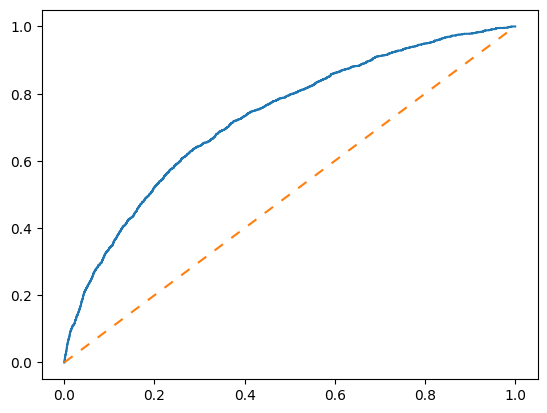

AUC: 0.728


In [18]:
fpr, tpr, thresholds = roc_curve(y_test,gbtree.predict_proba(X_test)[:,1],pos_label=1)
plt.plot(fpr, tpr, label='GB')

plt.plot([0,1], [0,1], label='No Discrimination', linestyle='-', dashes=(5, 5))
plt.show()

# calculate AUC
auc = roc_auc_score(y_test, gbtree.predict_proba(X_test)[:,1])
print('AUC: %.3f' % auc)

In [22]:
f1_GB = f1_score(y_test, y_pred)

print("f1_gb (binary): {}\n".format(f1_GB))
print(classification_report(y_test,y_pred))

f1_gb (binary): 0.00588523786169691

              precision    recall  f1-score   support

           0       0.92      1.00      0.96     22485
           1       0.38      0.00      0.01      2023

    accuracy                           0.92     24508
   macro avg       0.65      0.50      0.48     24508
weighted avg       0.87      0.92      0.88     24508



In [27]:
save_model_dir = ('gbtree_cv_final.pkl')
print("Saving model as: {}".format(save_model_dir))

#save the model
with open(save_model_dir, 'wb') as handle:
    pickle.dump(gbtree,handle,protocol=3)

Saving model as: gbtree_cv_final.pkl
